# Graph coloring problem
Given an undirected graph and a set of colors, color the graph so that adjacent nodes are different colors

In [1]:
# import necessary packages
import time
import numpy as np
import numpy.random as random

import dimod
import networkx as nx

from dwave.system.samplers import LeapHybridCQMSampler

# only for QUBO/classical solver
import pyqubo
from pyqubo import Binary, Constraint

## Generate graph
(started with graph from Glover's tutorial)

20 87


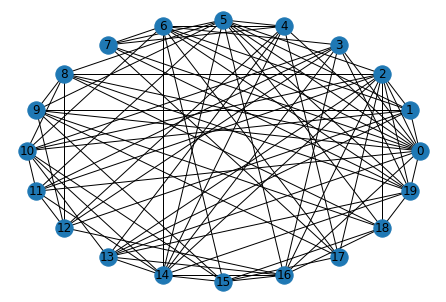

In [52]:
# # graph from glover
# graph = nx.Graph()
# graph.add_nodes_from([1,5])
# graph.add_edges_from([(1,2),(1,5),(2,3),(2,4),(2,5),(3,4),(4,5)])

# # graph.nodes.sort()
# print(type(graph.nodes))

# # house positions
# pos = {1: (0.5, 2.0), 2: (1, 1), 3: (1, 0), 4: (0, 0),  5: (0, 1)}

# nx.draw(graph, pos=pos, with_labels=True)

# generate random graph
# number of nodes
num_nodes = 20
# edge generation probability
p = 0.5
# seed (optional)
seed = 45
#generate graph
graph = nx.gnp_random_graph(num_nodes,p,seed)

pos = nx.circular_layout(graph)

# draw graph
nx.draw(graph, pos=pos, with_labels=True)

# number of colors
num_colors = max(d for _, d in graph.degree()) + 1


print(len(graph.nodes), len(graph.edges))

In [53]:
print(max(d for _, d in graph.degree()))

13


# Build CQM
change `num_colors` to try out coloring the graph with different numbers of colors

In [54]:
# specify number of colors
num_colors = max(d for _, d in graph.degree()) + 1

# instantiate cqm
cqm = dimod.ConstrainedQuadraticModel()

# Build CQM variables
node_colors = {n: {c: dimod.Binary((n, c)) for c in range(num_colors)} for n in graph.nodes}
color = [dimod.Binary(c) for c in range(num_colors)]

# Add objective: minimize number of colors
cqm.set_objective(sum(color))

# Add constraint for one color per node
for n in graph.nodes():
    cqm.add_constraint(sum(node_colors[n][c]*color[c] for c in range(num_colors)) == 1, label=f'discrete vars {n}')

# Build the constraints: edges have different color end points
for u, v in graph.edges:
    for c in range(num_colors):
        cqm.add_constraint(node_colors[u][c]*color[c]+node_colors[v][c]*color[c] <= 1, label=f'adj {u} {v} {c}')

In [55]:
print('objective   :', cqm.objective.to_polystring())
for i in cqm.constraints:
    print(i,":",cqm.constraints[i])

objective   : v0 + v1 + v2 + v3 + v4 + v5 + v6 + v7 + v8 + v9 + v10 + v11 + v12 + v13 + 0*v(0, 0) + 0*v(0, 1) + 0*v(0, 2) + 0*v(0, 3) + 0*v(0, 4) + 0*v(0, 5) + 0*v(0, 6) + 0*v(0, 7) + 0*v(0, 8) + 0*v(0, 9) + 0*v(0, 10) + 0*v(0, 11) + 0*v(0, 12) + 0*v(0, 13) + 0*v(1, 0) + 0*v(1, 1) + 0*v(1, 2) + 0*v(1, 3) + 0*v(1, 4) + 0*v(1, 5) + 0*v(1, 6) + 0*v(1, 7) + 0*v(1, 8) + 0*v(1, 9) + 0*v(1, 10) + 0*v(1, 11) + 0*v(1, 12) + 0*v(1, 13) + 0*v(2, 0) + 0*v(2, 1) + 0*v(2, 2) + 0*v(2, 3) + 0*v(2, 4) + 0*v(2, 5) + 0*v(2, 6) + 0*v(2, 7) + 0*v(2, 8) + 0*v(2, 9) + 0*v(2, 10) + 0*v(2, 11) + 0*v(2, 12) + 0*v(2, 13) + 0*v(3, 0) + 0*v(3, 1) + 0*v(3, 2) + 0*v(3, 3) + 0*v(3, 4) + 0*v(3, 5) + 0*v(3, 6) + 0*v(3, 7) + 0*v(3, 8) + 0*v(3, 9) + 0*v(3, 10) + 0*v(3, 11) + 0*v(3, 12) + 0*v(3, 13) + 0*v(4, 0) + 0*v(4, 1) + 0*v(4, 2) + 0*v(4, 3) + 0*v(4, 4) + 0*v(4, 5) + 0*v(4, 6) + 0*v(4, 7) + 0*v(4, 8) + 0*v(4, 9) + 0*v(4, 10) + 0*v(4, 11) + 0*v(4, 12) + 0*v(4, 13) + 0*v(5, 0) + 0*v(5, 1) + 0*v(5, 2) + 0*v(5, 3) + 0*v(

adj 4 12 10 : v(4, 10)*v10 + v10*v(12, 10) <= 1
adj 4 12 11 : v(4, 11)*v11 + v11*v(12, 11) <= 1
adj 4 12 12 : v(4, 12)*v12 + v12*v(12, 12) <= 1
adj 4 12 13 : v(4, 13)*v13 + v13*v(12, 13) <= 1
adj 4 13 0 : v(4, 0)*v0 + v0*v(13, 0) <= 1
adj 4 13 1 : v(4, 1)*v1 + v1*v(13, 1) <= 1
adj 4 13 2 : v(4, 2)*v2 + v2*v(13, 2) <= 1
adj 4 13 3 : v(4, 3)*v3 + v3*v(13, 3) <= 1
adj 4 13 4 : v(4, 4)*v4 + v4*v(13, 4) <= 1
adj 4 13 5 : v(4, 5)*v5 + v5*v(13, 5) <= 1
adj 4 13 6 : v(4, 6)*v6 + v6*v(13, 6) <= 1
adj 4 13 7 : v(4, 7)*v7 + v7*v(13, 7) <= 1
adj 4 13 8 : v(4, 8)*v8 + v8*v(13, 8) <= 1
adj 4 13 9 : v(4, 9)*v9 + v9*v(13, 9) <= 1
adj 4 13 10 : v(4, 10)*v10 + v10*v(13, 10) <= 1
adj 4 13 11 : v(4, 11)*v11 + v11*v(13, 11) <= 1
adj 4 13 12 : v(4, 12)*v12 + v12*v(13, 12) <= 1
adj 4 13 13 : v(4, 13)*v13 + v13*v(13, 13) <= 1
adj 4 14 0 : v(4, 0)*v0 + v0*v(14, 0) <= 1
adj 4 14 1 : v(4, 1)*v1 + v1*v(14, 1) <= 1
adj 4 14 2 : v(4, 2)*v2 + v2*v(14, 2) <= 1
adj 4 14 3 : v(4, 3)*v3 + v3*v(14, 3) <= 1
adj 4 14 4 : v

adj 13 14 5 : v(13, 5)*v5 + v5*v(14, 5) <= 1
adj 13 14 6 : v(13, 6)*v6 + v6*v(14, 6) <= 1
adj 13 14 7 : v(13, 7)*v7 + v7*v(14, 7) <= 1
adj 13 14 8 : v(13, 8)*v8 + v8*v(14, 8) <= 1
adj 13 14 9 : v(13, 9)*v9 + v9*v(14, 9) <= 1
adj 13 14 10 : v(13, 10)*v10 + v10*v(14, 10) <= 1
adj 13 14 11 : v(13, 11)*v11 + v11*v(14, 11) <= 1
adj 13 14 12 : v(13, 12)*v12 + v12*v(14, 12) <= 1
adj 13 14 13 : v(13, 13)*v13 + v13*v(14, 13) <= 1
adj 13 16 0 : v(13, 0)*v0 + v0*v(16, 0) <= 1
adj 13 16 1 : v(13, 1)*v1 + v1*v(16, 1) <= 1
adj 13 16 2 : v(13, 2)*v2 + v2*v(16, 2) <= 1
adj 13 16 3 : v(13, 3)*v3 + v3*v(16, 3) <= 1
adj 13 16 4 : v(13, 4)*v4 + v4*v(16, 4) <= 1
adj 13 16 5 : v(13, 5)*v5 + v5*v(16, 5) <= 1
adj 13 16 6 : v(13, 6)*v6 + v6*v(16, 6) <= 1
adj 13 16 7 : v(13, 7)*v7 + v7*v(16, 7) <= 1
adj 13 16 8 : v(13, 8)*v8 + v8*v(16, 8) <= 1
adj 13 16 9 : v(13, 9)*v9 + v9*v(16, 9) <= 1
adj 13 16 10 : v(13, 10)*v10 + v10*v(16, 10) <= 1
adj 13 16 11 : v(13, 11)*v11 + v11*v(16, 11) <= 1
adj 13 16 12 : v(13, 12)*

### Check time requirements and problem requirements
less than 10,000 vars and less than 100,000 constraints

In [56]:
sampler = LeapHybridCQMSampler()
print("time required:",sampler.min_time_limit(cqm))
print("num vars:",len(cqm.variables))
print("num constraints:",len(cqm.constraints))

time required: 5
num vars: 294
num constraints: 1238


## Sample/Solve

In [57]:
start = time.time()
# run hybrid solver
sampleset = sampler.sample_cqm(cqm, time_limit=10, label='CQM Graph Coloring small')
feasible_sampleset = sampleset.filter(lambda row: row.is_feasible)
elapsed = time.time() - start
print("Solved in %.2f seconds" % elapsed)

try:
    sample = feasible_sampleset.first.sample
    solution = feasible_sampleset.first
    print(solution)
except:
    print("\nNo feasible solutions found")
    solution = sampleset.first

Solved in 17.75 seconds
Sample(sample={0: 0.0, 1: 0.0, 2: 1.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 1.0, 10: 1.0, 11: 0.0, 12: 1.0, 13: 1.0, (0, 0): 0.0, (0, 1): 1.0, (0, 2): 0.0, (0, 3): 1.0, (0, 4): 1.0, (0, 5): 1.0, (0, 6): 0.0, (0, 7): 1.0, (0, 8): 0.0, (0, 9): 1.0, (0, 10): 0.0, (0, 11): 0.0, (0, 12): 0.0, (0, 13): 0.0, (1, 0): 0.0, (1, 1): 0.0, (1, 2): 0.0, (1, 3): 1.0, (1, 4): 1.0, (1, 5): 1.0, (1, 6): 1.0, (1, 7): 1.0, (1, 8): 0.0, (1, 9): 0.0, (1, 10): 0.0, (1, 11): 1.0, (1, 12): 0.0, (1, 13): 1.0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0, (2, 4): 1.0, (2, 5): 0.0, (2, 6): 0.0, (2, 7): 1.0, (2, 8): 1.0, (2, 9): 0.0, (2, 10): 0.0, (2, 11): 1.0, (2, 12): 1.0, (2, 13): 0.0, (3, 0): 0.0, (3, 1): 1.0, (3, 2): 0.0, (3, 3): 1.0, (3, 4): 0.0, (3, 5): 1.0, (3, 6): 1.0, (3, 7): 1.0, (3, 8): 1.0, (3, 9): 0.0, (3, 10): 0.0, (3, 11): 0.0, (3, 12): 1.0, (3, 13): 0.0, (4, 0): 0.0, (4, 1): 0.0, (4, 2): 0.0, (4, 3): 1.0, (4, 4): 1.0, (4, 5): 1.0, (4, 6): 1.0, (4, 7): 0.

In [58]:
print(feasible_sampleset)

     0   1   2   3   4   5   6   7   8   9  10 ... (19, 13) energy num_oc. ...
0  0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 ...      0.0    5.0       1 ...
2  0.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 ...      1.0    5.0       1 ...
3  1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 ...      0.0    5.0       1 ...
4  0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 ...      1.0    5.0       1 ...
5  0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 ...      0.0    5.0       1 ...
7  1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 ...      0.0    5.0       1 ...
8  0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 ...      0.0    5.0       1 ...
9  0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 ...      0.0    5.0       1 ...
10 1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 ...      1.0    5.0       1 ...
11 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 ...      0.0    5.0       1 ...
12 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 ...      1.0    5.0       1 ...
13 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 ...  

In [59]:
soln = list(solution.sample.values())
obj_val = solution.energy
print("solution:",solution.sample)
print("objective function value:",obj_val)

solution: {0: 0.0, 1: 0.0, 2: 1.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 1.0, 10: 1.0, 11: 0.0, 12: 1.0, 13: 1.0, (0, 0): 0.0, (0, 1): 1.0, (0, 2): 0.0, (0, 3): 1.0, (0, 4): 1.0, (0, 5): 1.0, (0, 6): 0.0, (0, 7): 1.0, (0, 8): 0.0, (0, 9): 1.0, (0, 10): 0.0, (0, 11): 0.0, (0, 12): 0.0, (0, 13): 0.0, (1, 0): 0.0, (1, 1): 0.0, (1, 2): 0.0, (1, 3): 1.0, (1, 4): 1.0, (1, 5): 1.0, (1, 6): 1.0, (1, 7): 1.0, (1, 8): 0.0, (1, 9): 0.0, (1, 10): 0.0, (1, 11): 1.0, (1, 12): 0.0, (1, 13): 1.0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0, (2, 4): 1.0, (2, 5): 0.0, (2, 6): 0.0, (2, 7): 1.0, (2, 8): 1.0, (2, 9): 0.0, (2, 10): 0.0, (2, 11): 1.0, (2, 12): 1.0, (2, 13): 0.0, (3, 0): 0.0, (3, 1): 1.0, (3, 2): 0.0, (3, 3): 1.0, (3, 4): 0.0, (3, 5): 1.0, (3, 6): 1.0, (3, 7): 1.0, (3, 8): 1.0, (3, 9): 0.0, (3, 10): 0.0, (3, 11): 0.0, (3, 12): 1.0, (3, 13): 0.0, (4, 0): 0.0, (4, 1): 0.0, (4, 2): 0.0, (4, 3): 1.0, (4, 4): 1.0, (4, 5): 1.0, (4, 6): 1.0, (4, 7): 0.0, (4, 8): 0.0, (4, 9): 0.0,

In [60]:
ye = 0
for i in solution.is_satisfied:
    if not i:
        ye += 1
print(ye)

0


# Redraw graph with solution

In [61]:
gcolors = ['red', 'blue', 'green', 'black', 'cyan', 'orange', 'yellow', 'purple', 'olive', 'grey']
color_map = np.empty(len(graph.nodes), dtype=object)

nodes = np.array(sorted(graph.nodes))

for i in solution.sample:
    if type(i) is tuple and solution.sample[i] > 0.5:
        if solution.sample[i[1]] > 0.5: # get rid of double color assignment when one of the colors not used
            color_map[i[0]] = gcolors[i[1]]

print(nodes)
print(color_map)
        
# draw graph
nx.draw(graph, pos=pos, node_color=color_map, with_labels=True)

IndexError: list index out of range

## Solve Classically

each node one color: $\sum^K_{j=1}x_{ij}=1 \; i=1,...,n$  
adjacent diff colors: $x_{ip}+x_{jp}\leq1 \; p=1,...,K$

In [12]:
# define variables
colors = [[Binary(f'({n}, {c})') for c in range(num_colors)] for n in graph.nodes]

print(colors)

P = 4
H = 0
# color one hot
for n in graph.nodes:
    H += P*Constraint((sum(colors[n][c] for c in range(num_colors))-1)**2, label=f'one hot{n}')

# adjacent nodes
for i,j in graph.edges:
    H += P*Constraint(sum(colors[i][p]*colors[j][p] for p in range(num_colors)), label=f'adjacent {i},{j}')

model = H.compile()
Q = model.to_bqm()
print(Q.to_polystring())

[[Binary('(0, 0)'), Binary('(0, 1)'), Binary('(0, 2)'), Binary('(0, 3)'), Binary('(0, 4)'), Binary('(0, 5)'), Binary('(0, 6)'), Binary('(0, 7)'), Binary('(0, 8)'), Binary('(0, 9)')], [Binary('(1, 0)'), Binary('(1, 1)'), Binary('(1, 2)'), Binary('(1, 3)'), Binary('(1, 4)'), Binary('(1, 5)'), Binary('(1, 6)'), Binary('(1, 7)'), Binary('(1, 8)'), Binary('(1, 9)')], [Binary('(2, 0)'), Binary('(2, 1)'), Binary('(2, 2)'), Binary('(2, 3)'), Binary('(2, 4)'), Binary('(2, 5)'), Binary('(2, 6)'), Binary('(2, 7)'), Binary('(2, 8)'), Binary('(2, 9)')], [Binary('(3, 0)'), Binary('(3, 1)'), Binary('(3, 2)'), Binary('(3, 3)'), Binary('(3, 4)'), Binary('(3, 5)'), Binary('(3, 6)'), Binary('(3, 7)'), Binary('(3, 8)'), Binary('(3, 9)')], [Binary('(4, 0)'), Binary('(4, 1)'), Binary('(4, 2)'), Binary('(4, 3)'), Binary('(4, 4)'), Binary('(4, 5)'), Binary('(4, 6)'), Binary('(4, 7)'), Binary('(4, 8)'), Binary('(4, 9)')], [Binary('(5, 0)'), Binary('(5, 1)'), Binary('(5, 2)'), Binary('(5, 3)'), Binary('(5, 4)')

200 - 4*(18, 1) - 4*(18, 6) - 4*(37, 3) - 4*(37, 6) - 4*(24, 2) - 4*(24, 4) - 4*(18, 2) - 4*(18, 5) - 4*(46, 2) - 4*(46, 3) - 4*(26, 0) - 4*(26, 8) - 4*(39, 0) - 4*(39, 1) - 4*(21, 7) - 4*(36, 7) - 4*(35, 0) - 4*(35, 4) - 4*(29, 0) - 4*(33, 0) - 4*(5, 4) - 4*(33, 4) - 4*(13, 7) - 4*(13, 8) - 4*(19, 2) - 4*(19, 8) - 4*(9, 4) - 4*(9, 8) - 4*(41, 2) - 4*(41, 3) - 4*(43, 4) - 4*(43, 9) - 4*(43, 1) - 4*(43, 2) - 4*(31, 3) - 4*(38, 3) - 4*(1, 0) - 4*(1, 3) - 4*(15, 3) - 4*(15, 7) - 4*(47, 1) - 4*(47, 7) - 4*(9, 0) - 4*(9, 9) - 4*(37, 9) - 4*(20, 7) - 4*(29, 7) - 4*(33, 8) - 4*(11, 7) - 4*(26, 7) - 4*(17, 0) - 4*(17, 8) - 4*(32, 3) - 4*(45, 3) - 4*(0, 6) - 4*(45, 6) - 4*(39, 5) - 4*(46, 5) - 4*(39, 7) - 4*(27, 8) - 4*(46, 8) - 4*(30, 6) - 4*(30, 8) - 4*(23, 2) - 4*(23, 7) - 4*(12, 5) - 4*(12, 8) - 4*(4, 9) - 4*(32, 9) - 4*(14, 3) - 4*(25, 3) - 4*(5, 8) - 4*(1, 2) - 4*(10, 4) - 4*(34, 4) - 4*(16, 0) - 4*(16, 6) - 4*(36, 5) - 4*(36, 8) - 4*(15, 2) - 4*(15, 8) - 4*(12, 4) - 4*(44, 6) - 4*(44, 8)

### Sample

In [13]:
start = time.time()
sampler = dimod.SimulatedAnnealingSampler()
response = sampler.sample(Q)
elapsed = time.time() - start
print("Solved in %.2f seconds" % elapsed)
print(response)

solution1 = response.first
print(solution1)

Solved in 51.88 seconds
  (0, 0) (0, 1) (0, 2) (0, 3) (0, 4) (0, 5) (0, 6) ... (9, 9) energy num_oc.
0      0      0      0      0      0      0      0 ...      0    0.0       1
1      0      0      0      0      0      0      0 ...      0    0.0       1
2      0      0      0      0      0      0      0 ...      0    0.0       1
3      0      1      0      0      0      0      0 ...      1    0.0       1
4      0      0      0      0      0      1      0 ...      0    0.0       1
5      0      0      0      0      0      0      0 ...      0    0.0       1
6      0      0      0      0      1      0      0 ...      0    0.0       1
7      0      1      0      0      0      0      0 ...      0    0.0       1
8      0      1      0      0      0      0      0 ...      0    0.0       1
9      0      0      0      0      0      1      0 ...      0    0.0       1
['BINARY', 10 rows, 10 samples, 500 variables]
Sample(sample={'(0, 0)': 0, '(0, 1)': 0, '(0, 2)': 0, '(0, 3)': 0, '(0, 4)': 0, '(

### Redraw Graph with solution

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
['grey' 'red' 'cyan' 'green' 'orange' 'cyan' 'red' 'grey' 'orange' 'olive'
 'black' 'cyan' 'yellow' 'blue' 'olive' 'green' 'red' 'purple' 'purple'
 'blue' 'green' 'blue' 'orange' 'yellow' 'cyan' 'orange' 'purple' 'green'
 'purple' 'yellow' 'green' 'black' 'black' 'red' 'cyan' 'yellow' 'black'
 'blue' 'yellow' 'olive' 'purple' 'grey' 'green' 'grey' 'grey' 'olive'
 'red' 'black' 'olive' 'cyan']


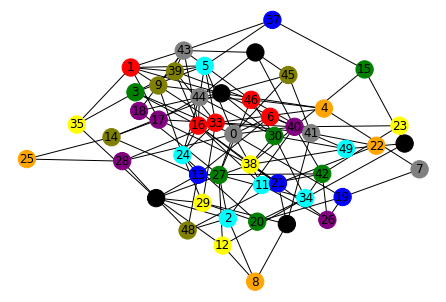

In [14]:
gcolors = ['red', 'blue', 'green', 'black', 'cyan', 'orange', 'yellow', 'purple', 'olive', 'grey']
color_map = np.empty(len(graph.nodes), dtype=object)

sorted_nodes = np.array(sorted(graph.nodes))

for n in graph.nodes:
    for c in range(num_colors):
        i = f'({n}, {c})'
        if response.first.sample[i] > 0.5:
            color_map[n] = gcolors[c]
        if color_map[n] is None:
            color_map[n] = "white"

print(graph.nodes)
print(color_map)
        
# draw graph
nx.draw(graph, node_color=color_map, with_labels=True)

In [15]:
dec = model.decode_sample(response.first.sample, vartype='BINARY')
print(dec.constraints(only_broken=True))
print(len(dec.constraints(only_broken=True)))

{}
0
